In [21]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [22]:
Nt = 200
Nx = 20
Ny = 20

x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Nx)
t = np.linspace(0,3,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 3.

lambda_ = v*deltat/deltax
mu_ = 5*deltat/deltay

print(lambda_,mu_)

0.4296482412060302 0.7160804020100502


In [23]:
def ui(x,y):
    
    return np.sin(np.pi*x)*np.sin(np.pi*y)


In [24]:
def InitT():
    
    u = np.zeros((Nt,Nx,Ny))
    for i in range(len(x)):
        for j in range(len(y)):
            u[0,i,j] = ui(x[i],y[j])
    
    return u

In [25]:
u = InitT()


<IPython.core.display.Javascript object>


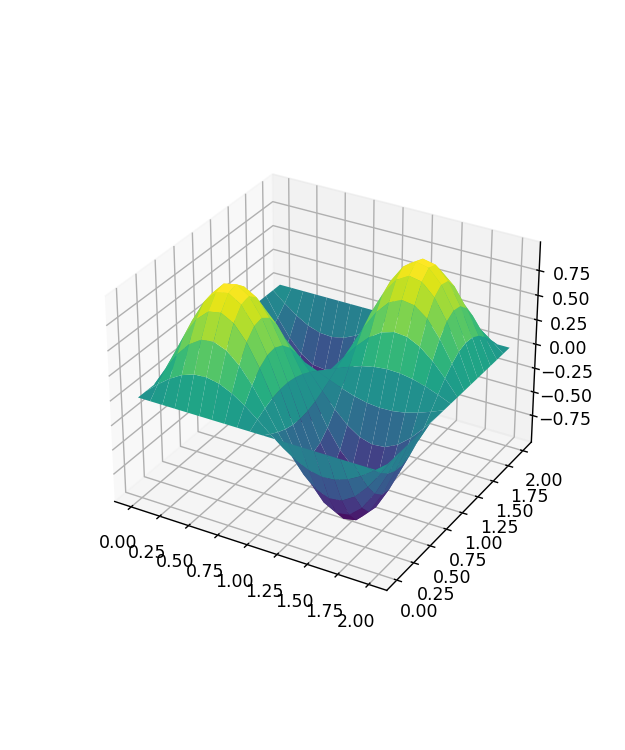

In [26]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(x,y)
ax.plot_surface(X,Y,u[0,:,:],cmap='viridis')

In [27]:
def GetSolution():
    
    gamma = 3*deltat
    
    for l in tqdm(range(1,len(t))):
        
        if l == 1:
            u[l,:,:] = u[l-1,:,:]
        else:
        
            for i in range(2,len(x)-1):
                for j in range(2,len(y)-1):
                    u[l,i,j] = 2*(1-lambda_**2-mu_**2)*u[l-1,i,j] \
                    + lambda_**2*( u[l-1,i+1,j] + u[l-1,i-1,j] ) \
                    + mu_**2*( u[l-1,i,j+1] + u[l-1,i,j-1] ) \
                    - u[l-2,i,j]

In [28]:
GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 1194.72it/s]


<IPython.core.display.Javascript object>


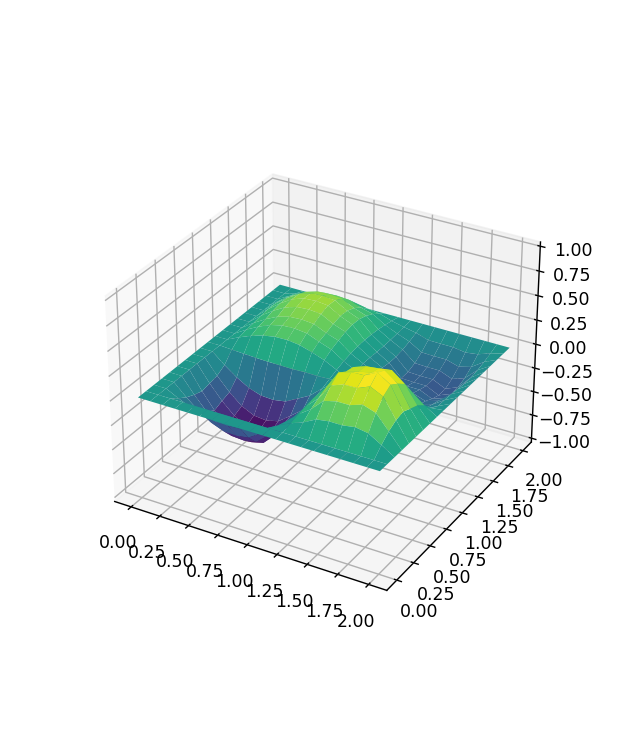

In [29]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    """
    ax.set_xlim3d(0,0.75)
    ax.set_ylim3d(0,0.75)"""
    ax.set_zlim3d(-1,1)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [30]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800 )
Animation.save( 'punto5Animacion.gif', writer=writer )